# Naive Bayes

Naive Bayes is a supervised learning algorithm that is based on applying Bayes’ theorem with the “naive” assumption. 

The Bayes Rule gives the formula for the probability of Y given X. 

It is called Naive because of the naive assumption that the X’s are independent of each other. 

**Applications of Naive Bayes:**
1) Face Recognition
2) Weather Prediction
3) Medical Prediction
4) News Classification

**Shopping Demo:** example problem statement: To predict whether a person will purchase a product on a specific combination of Day, Discount, and Free Delivery using Naive Bayes Classifier

**Advantages of Naive Bayes:**
1) Easy to implement
2) Works well with less training data
3) Handles both continuous and discrete data
4) Highly Scalable
5) Can be used in rel-time predictions
6) Not sensitive to irrelevant features

In [1]:
# Impoting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups
df = fetch_20newsgroups()
df.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
%matplotlib inline

In [3]:
categories = df.target_names

In [4]:
categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)


In [8]:
print(len(train.data))

11314


In [9]:
print(len(test.data))

7532


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(110.44999999999996, 0.5, 'Predicted Label')

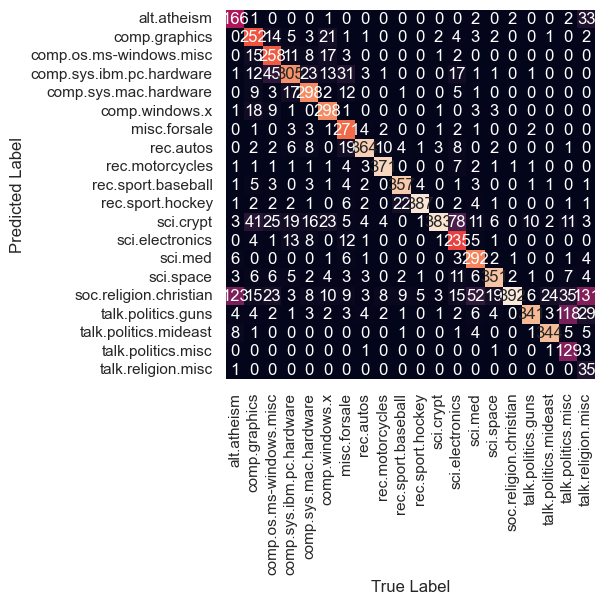

In [14]:
# Creating confusion matrix and heatmap

from sklearn.metrics import confusion_matrix
cf = confusion_matrix(test.target, labels)
sns.heatmap(cf.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [16]:
# Predicting Category on new data based on trained model
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [17]:
predict_category('Jesus Christ')

'soc.religion.christian'

In [18]:
predict_category('I read about a fascinating new discovery on the internet today. They said that they sent the first man in the space in the early 1960s.')

'sci.space'

In [19]:
predict_category('perez is catching charles leclerc and takes it towards the inseide. Perez on the inside, charles leclerc gives him just enough space. Can perez squeeze past? They are going wheel to wheel.')

'rec.autos'

In [21]:
predict_category('Box Box')

'misc.forsale'